## Лабораторна робота 4. **REGRESSION** 📈

# Опис вибірки "Motorbike Ambulance Calls"


Аварії за участю мотоциклів та відповідні виклики швидкої допомоги сильно залежать від екологічних та сезонних умов, таких як погодні умови, опади, день тижня, сезон, година дня тощо. Дані збирались протягом двох років щогодини та потім співвідносилися з відповідною погодою та сезонністю.

Основні характеристики вибірки `motorbike_ambulance_calls.csv`:

              - index: record index
              - date : date
              - season : season (1:springer, 2:summer, 3:fall, 4:winter)
              - yr : year (0: 2011, 1:2012)
              - mnth : month ( 1 to 12)
              - hr : hour (0 to 23)
              - holiday : whether day is holiday or not
              - weekday : day of the week
              - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
              -  weathersit :
                      - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
              - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
              - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
              - hum: Normalized humidity. The values are divided to 100 (max)
              - windspeed: Normalized wind speed. The values are divided to 67 (max)
              - cnt: count of total ambulance calls

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `motorbike_ambulance_calls.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. окремо вивести максимальні та мінімальні значення по всім змінним;  
5. вивести розмірність датасету;

In [2]:
import pandas as pd
import numpy as np
import scipy as sc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
def get_data(data_path: str):
    data = pd.read_csv(data_path)  
    return data

In [4]:
data = get_data(data_path = "./motorbike_ambulance_calls.csv")


In [5]:
data.describe()

,index,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,5017.0295,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.0000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,8690.0000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,13034.5000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,17379.0000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


In [32]:
data.max()

index                       17379
date          2012-12-31 00:00:00
season                          3
yr                              1
mnth                           12
hr                             23
holiday                         1
weekday                         6
workingday                      1
weathersit                      4
temp                          1.0
atemp                         1.0
hum                           1.0
windspeed                  0.8507
cnt                           977
dtype: object

In [6]:
data.min()

index              1
date          1/1/11
season        autumn
yr                 0
mnth               1
hr                 0
holiday            0
weekday            0
workingday         0
weathersit         1
temp            0.02
atemp            0.0
hum              0.0
windspeed        0.0
cnt                1
dtype: object

In [8]:
data.shape

(17379, 15)

**Завдання 2** перевірити типи даних та перевірте кількість даних по кожній змінній.

In [33]:
data.dtypes

index                  int64
date          datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
cnt                    int64
dtype: object

In [34]:
data.count()

index         17379
date          17379
season        17379
yr            17379
mnth          17379
hr            17379
holiday       17379
weekday       17379
workingday    17379
weathersit    17379
temp          17379
atemp         17379
hum           17379
windspeed     17379
cnt           17379
dtype: int64

**Завдання 3** пепевірте всі змінні на наявність пропусків.

In [10]:
data.isnull().sum()

index         0
date          0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

**Висновки з 1-3 завдання (детальні)**



1.   дані нормалізовані, без аномалій. датасет містить 17379 рядків і 15 стовпців. кількість викликів швидкої (cnt) варіюється від 1 до 977
2.   типи даних показали, що більшість змінних мають числовий тип (int64 або float64), а змінні date та season мають тип object. кількість заповнених значень у кожній змінній становить 17379, що означає відсутність порожніх рядків або неповних записів
3.  пропущених значень немає в жодній колонці



**Завдання 4** перетворіть змінну `date` в **date type**. Визначте часові межі датасету.

In [11]:
def tranform_date(df: pd.DataFrame, date_col_name: str):
  df[date_col_name] = pd.to_datetime(df[date_col_name], format='%m/%d/%y')
  return df
  
dataset = tranform_date(data, 'date')


In [35]:
def get_time_limits(df: pd.DataFrame, date_col_name: str):
    first_day = df[date_col_name].min()
    last_day = df[date_col_name].max()
    print(f"First day of dataset - {first_day}.\n Last day of dataset - {last_day}")
    
get_time_limits(data, 'date')

First day of dataset - 2011-01-01 00:00:00.
 Last day of dataset - 2012-12-31 00:00:00


після перетворення вдалося визначити, що датасет охоплює часовий проміжок від 1 січня 2011 року до 31 грудня 2012 року, тобто два повних роки даних

**Завдання 5** виділити категоріальні змінні в окремий датасет







In [ ]:
data_categorical = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
data_categorical = data[data_categorical].copy()

**Завдання 6** перетворіть змінну `season` в числову шкалу.

In [14]:
season_to_numeric = {"spring": 0, "summer": 1, "autumn": 2, "winter": 3}

def encode_season(df: pd.DataFrame, season_col_name: str):
  df[season_col_name] = dataset[season_col_name].map(season_to_numeric)
  return df
  
data = encode_season(dataset, 'season')

**Завдання 7** побудувати графіки `countplot` по всім категоріальним змінним

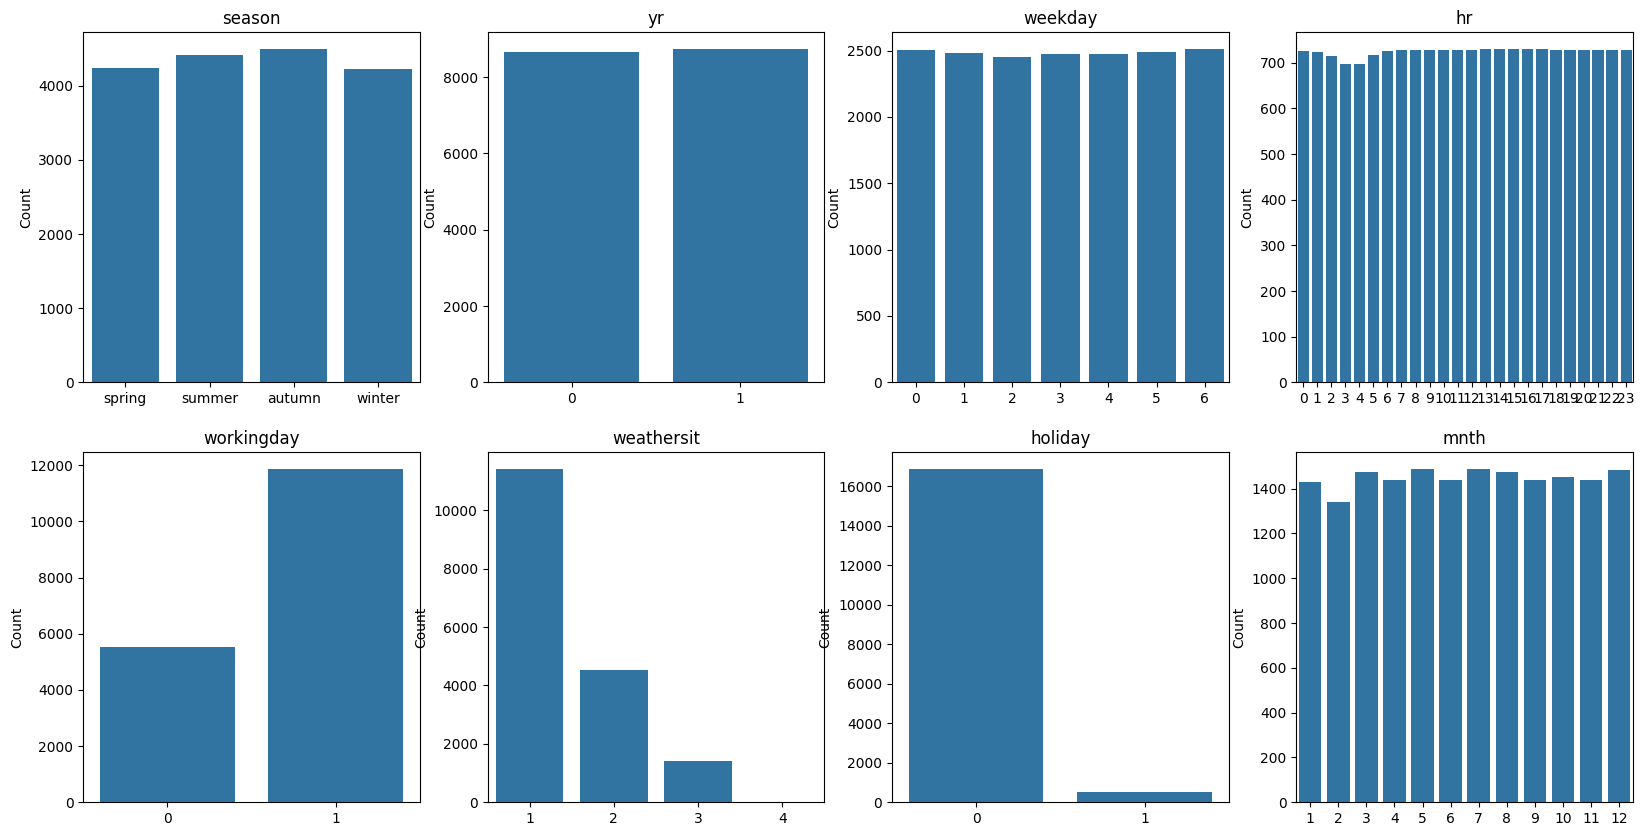

In [36]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(data_categorical, ax.flatten()):
  sns.countplot(data=data_categorical, x=variable, ax=subplot)
  subplot.set_title(variable)
  subplot.set_xlabel('')
  subplot.set_ylabel('Count')
plt.show()

**Висновки з 5-7 завдання (детальні)**


1.   у п’ятому завданні були виділені категоріальні змінні в окремий датасет. серед них є як змінні типу object, так і числові змінні з дискретними значеннями, що мають категоріальний зміст (наприклад, hr, mnth, weathersit)
2.  у шостому завданні змінну season була перетворена в числову шкалу, що дозволяє ефективно використовувати її в подальшому аналізі та моделюванні. завдяки цьому завдванні кожна пора року отримала власне числове представлення, що спрощує побудову графіків 
3. у сьомому завданні для кожної категоріальної змінної були побудовані графіки countplot. з них можна зробити наступні висновки: 

кількість аварій не залежить від пори року. всі сезони мають приблизно однаковий рівень викликів;

місяць, день тижня також не показує явних коливань у кількості аварій;

також можна зробити висновок, що в робочі дні є підвищений ризик потрапити в аварію, але враховуючи що робочих днів у календарі більше, то це не є свідченням підвищеного ризику

**Завдання 8** виділити числові змінні в окремий датасет

In [37]:
data_numerical = ['atemp', 'temp', 'hum', 'windspeed', 'cnt']
data_numerical = data[data_numerical].copy()

**Завдання 9** побудуйте гістограми розподілу по всім числовим змінним

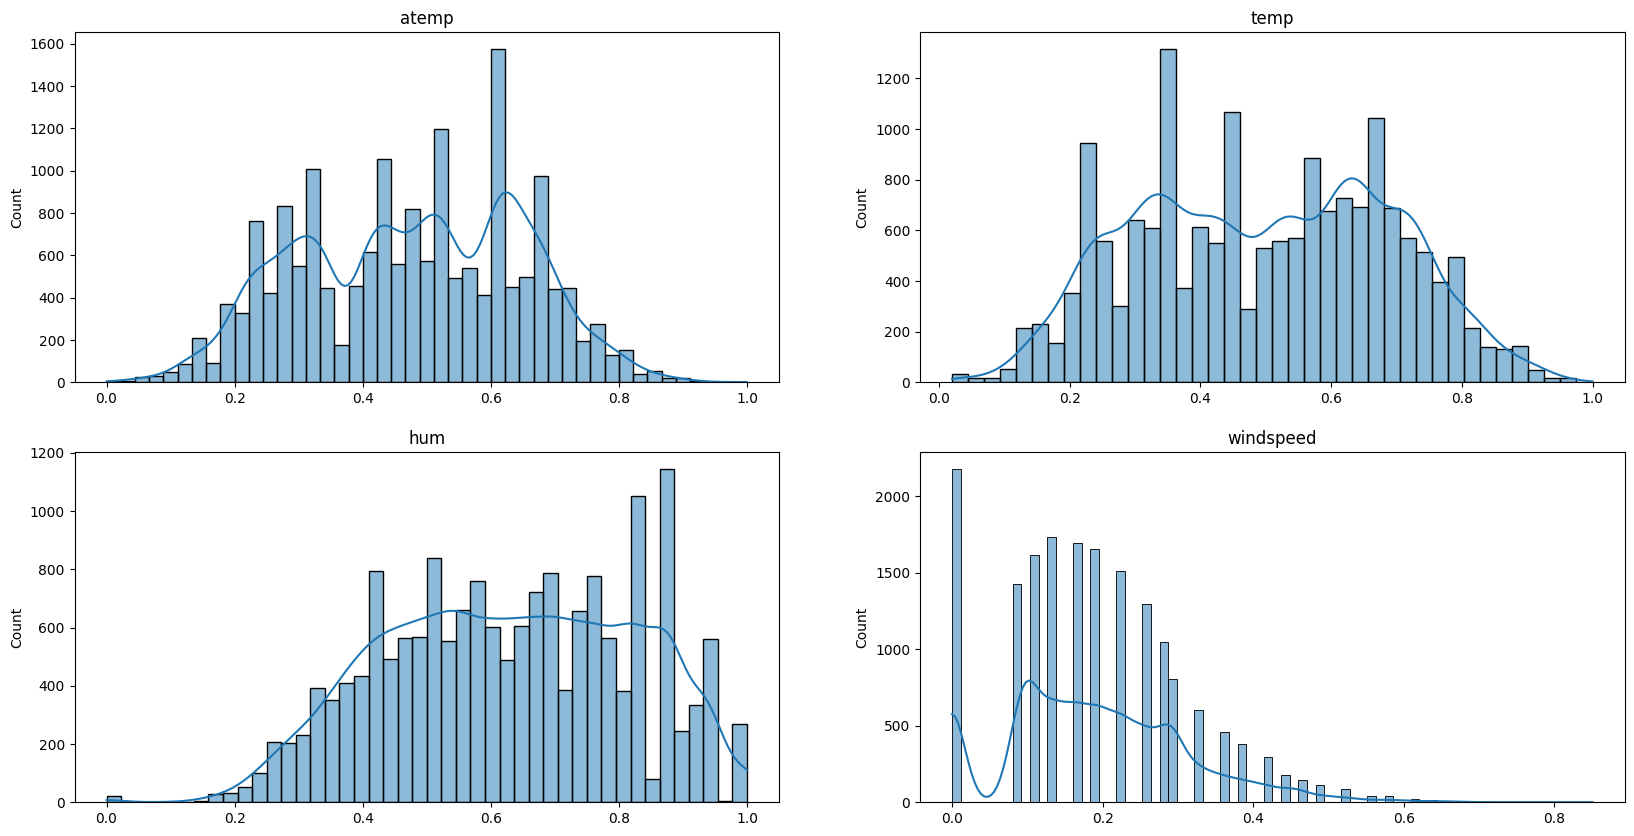

In [38]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
for variable, subplot in zip(data_numerical, ax.flatten()):
    sns.histplot(data=data_numerical, x=variable, kde=True, ax=subplot)
    subplot.set_title(f'{variable}')
    subplot.set_xlabel('')
    subplot.set_ylabel('Count')
plt.show()

**Завдання 10** побудуйте гістограму розподілу цільової змінної та розрахуйте коефіціент нахилу

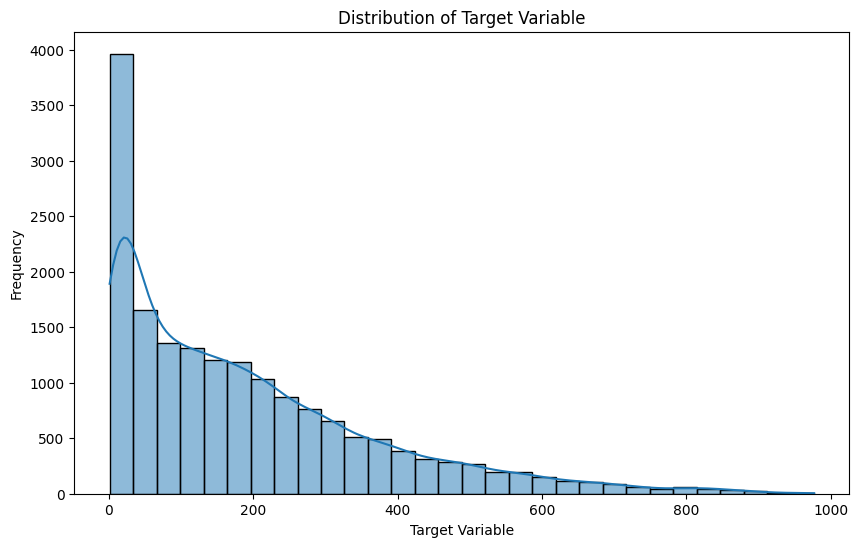

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(data['cnt'], bins=30, kde=True)
plt.title("Distribution of Target Variable")
plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.show()

In [40]:
X = data[['index']]
y = data['cnt']
model = LinearRegression()
model.fit(X, y)
slope_coefficients = model.coef_
intercept = model.intercept_

print(f"Coeficient: {slope_coefficients}\nIntercept: {intercept}")

Coeficient: [0.01006461]
Intercept: 102.00163079471257


**Висновки з 8-10 завдання (детальні)**



1.   у восьмому завданні були відібрані основні числові змінні: 'atemp', 'temp', 'hum', 'windspeed' і цільова змінна 'cnt'
2.   у дев’ятому завданні для кожної з цих змінних були побудовані гістограми розподілу. з графіків видно, що температура (temp, atemp) має форму, близьку до нормального розподілу, тоді як вологість (hum) і швидкість вітру (windspeed) демонструють легку асиметрію
3. отриманий коефіцієнт нахилу дорівнює приблизно 0.0101, а вільний член — 102.00. це свідчить про наявність легкого висхідного тренду: з кожним новим записом середня кількість викликів зростає на 0.01. хоча зростання є незначним, воно вказує на поступове підвищення кількості викликів протягом аналізованого періоду. це може бути пов’язано із сезонними чи соціальними факторами, збільшенням населення або активності в місті



#Аналіз взаємозв'язків між числовими і категоріальними змінними

**Завдання 11** побудуйте графіки співвідношення `scatterplot` між всіма числовими змінними і цільовою змінною `cnt`

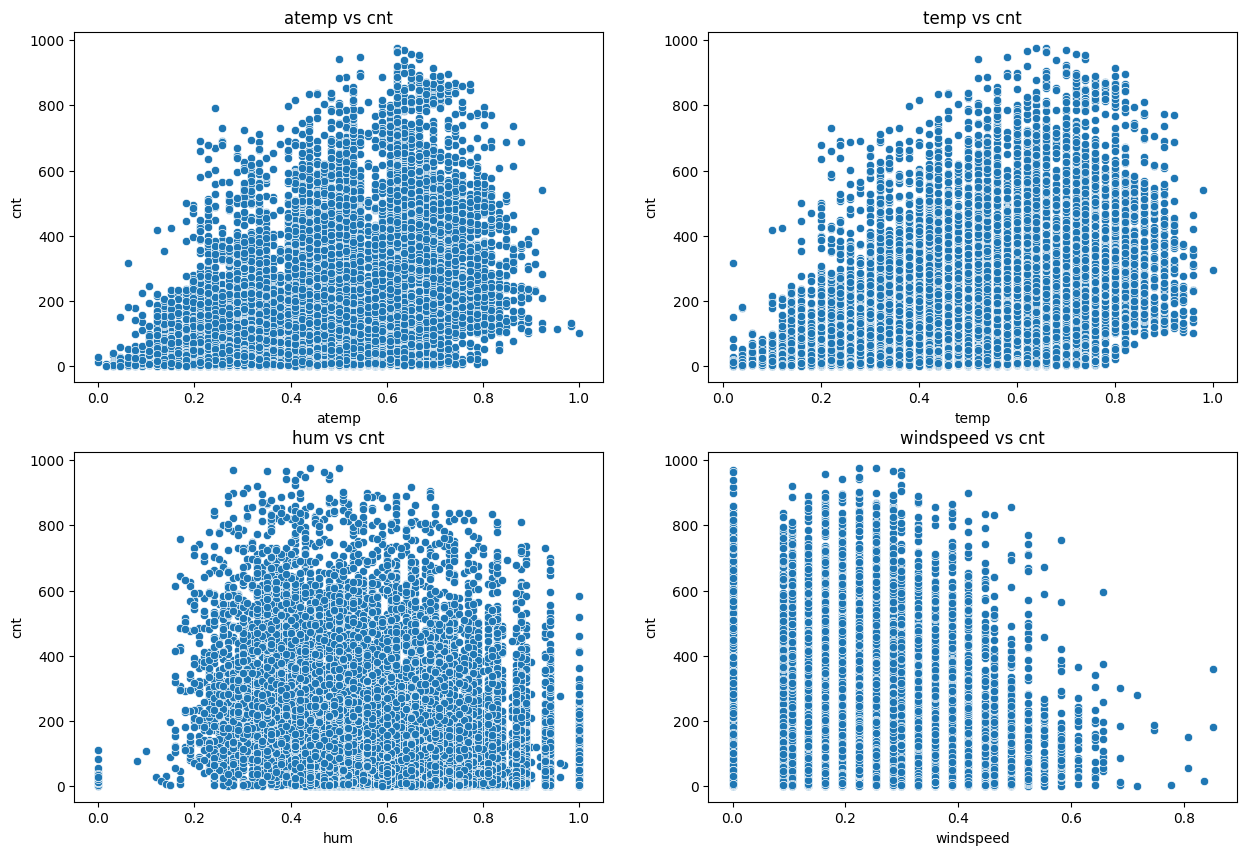

In [41]:
fig, ax = plt.subplots(2,2, figsize=(15, 10))
for var, subplot in zip(data_numerical.drop('cnt', axis =1), ax.flatten()):
  sns.scatterplot(data=data_numerical, x=var, y='cnt', ax=subplot)
  subplot.set_title(f'{var} vs cnt')
  subplot.set_xlabel(var)
  subplot.set_ylabel('cnt')
plt.show()

**Завдання 12** побудуйте графіки співвідношення `boxplot`[boxplot](https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html) між категоріальними змінними і цільовою змінною `cnt`.

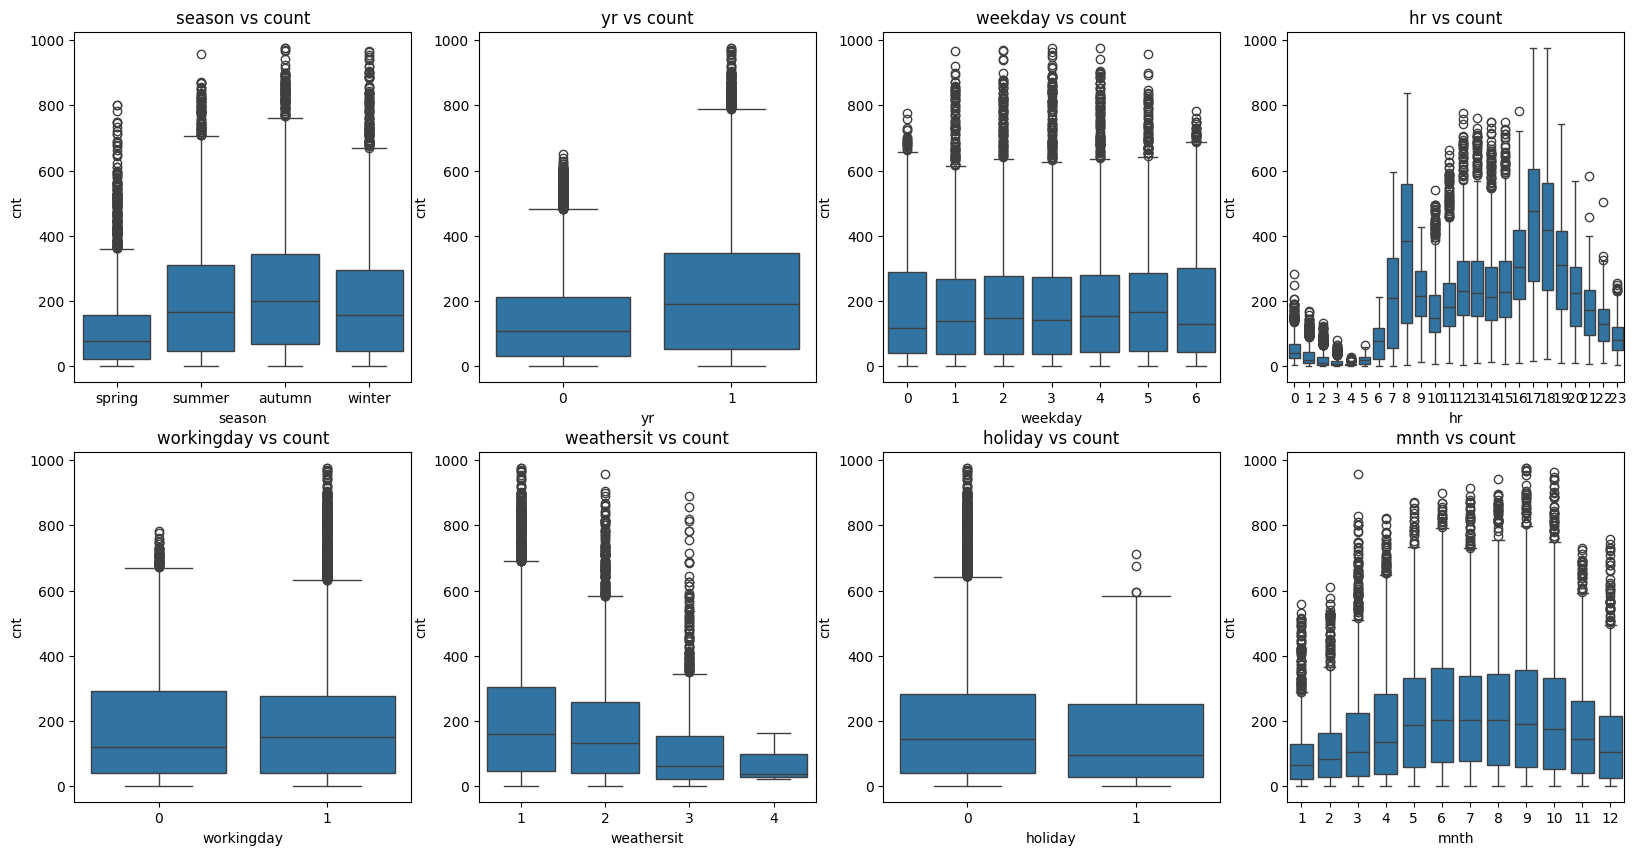

In [43]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for var, subplot in zip(data_categorical, ax.flatten()):
  sns.boxplot(x=data_categorical[var], y=data['cnt'], ax=subplot)
  subplot.set_title(f"{var} vs count")
  subplot.set_xlabel(var)
  subplot.set_ylabel('cnt')
plt.show()


**Висновки з 11-12 завдання (детальні)**

1. у завданні 11 було побудовано графіки розсіювання (scatterplot) для кожної числової змінної у зв’язку з цільовою змінною cnt. візуалізація показала, що між температурою і кількістю викликів існує залежність. із підвищенням температури кількість викликів зростає. для вологості та швидкості вітру чіткої залежності нема. розсіювання є хаотичним, що може показувати слабкий або відсутній вплив цих факторів на частоту викликів швидкої
2. у завданні 12 були побудовані графіки boxplot для кожної категоріальної змінної у співвідношенні до цільової змінної cnt. ці графіки дозволили оцінити, як змінюється розподіл викликів у межах кожної категорії. наприклад, для змінної hr видно, що вранці та ввечері кількість викликів вища, а вночі нижча. за змінною yr видно збільшення викликів у другий рік. для season та mnth відмінності не такі значні, що показує відсутність залежностей від сезонів



**Завдання 13** Побудувати матрицю кореляції:  

1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти  
3.   Вирахувати кореляційні коефіціенти для набору данних за методом Спірмана
4.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

5. Описати отримані результати, спираючись на значення коефіціентів кореляції та пояснити в чому відмінність обраних методів.

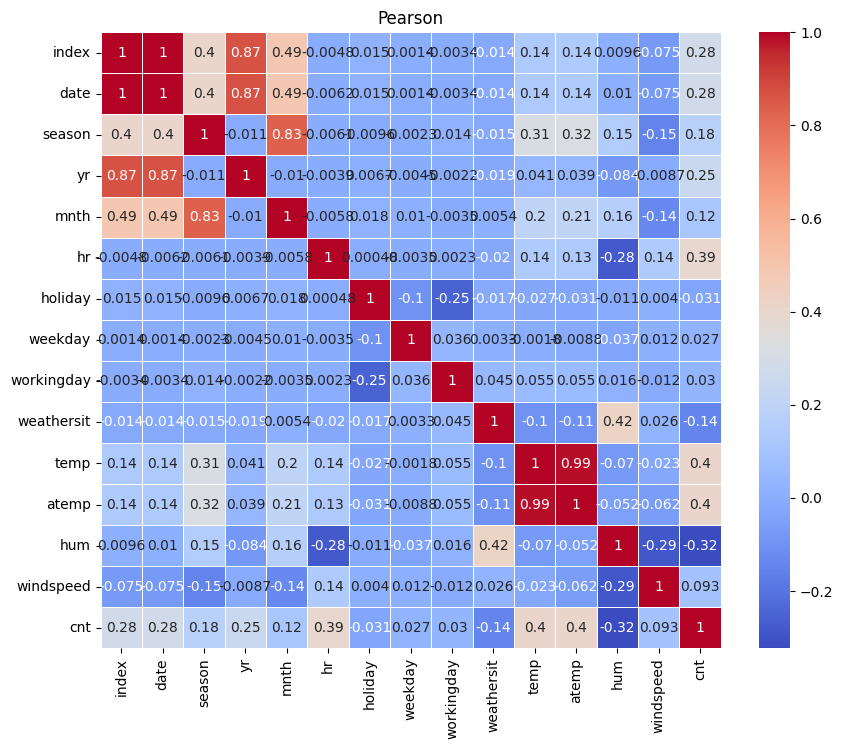

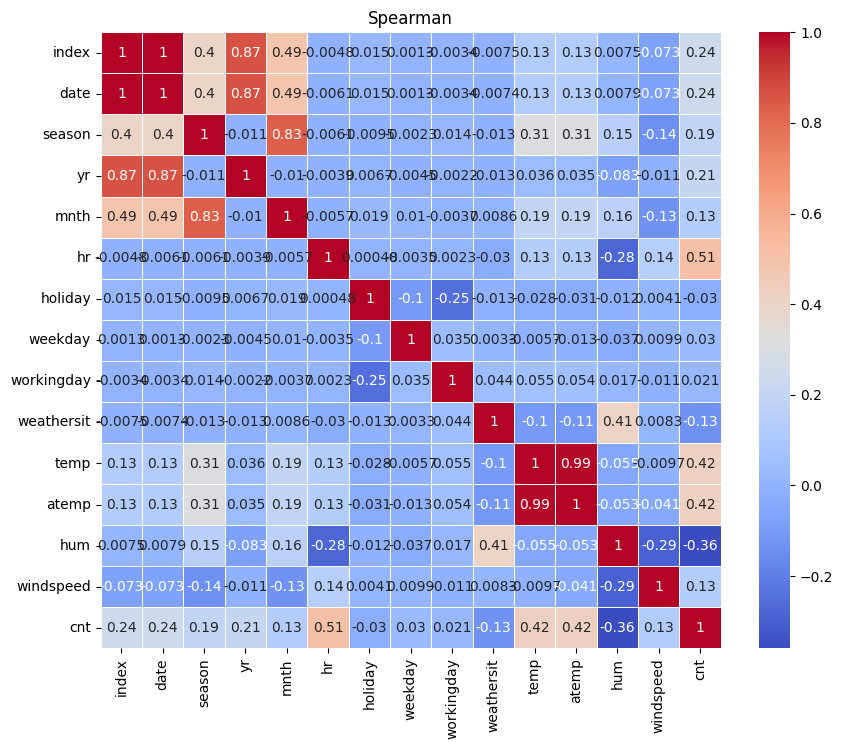

In [46]:
correlation_pearson = data.corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_pearson, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Pearson")
plt.show()

correlation_spearman = data.corr(method='spearman')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_spearman, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Spearman")
plt.show()

метод Пірсона показав, що cnt найбільше залежить від години, температури та має негативний зв’язок з вологістю. метод Спірмана підтвердив ці зв’язки, але виявив ще сильнішу залежність між cnt і годиною, а також глибший негативний зв’язок з вологістю. обидва методи дали подібні результати, але Спірман краще виявляє нелінійні залежності, що важливо для реальних даних

**Завдання 14** 
1. побудувати модель лінійної регресії:
2. видалити змінні, які НЕ є релевантними;

3. поділити вибірку на `train`, `test` та `validation` в пропорції `70/30`;  

4. провести навчання моделі лінійної регресії;

1. Для подальшої роботи з моделями для кожної категоріальної змінної ми створимо фіктивні змінні, щоб уникнути неправильного порядку категорій. [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

In [23]:
def get_dummies(df: pd.DataFrame):
  features = pd.concat([df,
                    pd.get_dummies(df['season'], prefix='season'),
                    pd.get_dummies(df['mnth'], prefix='mnth'),
                    pd.get_dummies(df['weekday'], prefix='weekday'),
                    pd.get_dummies(df['weathersit'], prefix='weathersit')
                          ], axis = 1
                     )
  features = features.drop(['season',
                            'mnth', 
                            'weekday', 
                            'weathersit'
                            ], axis = 1)
  return features



In [24]:
features = get_dummies(data)

2. На основі змінної часу створіть нову змінну, яка відповідатиме за день і ніч.

In [25]:
features['night_hours'] = dataset['hr'].apply(lambda x: 1 if (x >=0 and x<= 6) or (x>=20 and x<=23) else 0)


**Модель лінійної регрессії  

[train_linear_model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Після отримання фіктивних змінних потрібно видалити по одній з кожної категорії, щоб запобігти мультиколінеарності. Також видаляємо ще два атрибути `date` та `atemp` - поясніть чому?

In [26]:
features_lr = features.drop(['season_0', 'mnth_4', 'weekday_0', 'weathersit_1','atemp', 'date'], axis = 1)

In [27]:
def get_train_data(df: pd.DataFrame, target:str, test_size:float):
  X = df.drop(columns=[target])
  y = df[target]
  X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=test_size, random_state=42, shuffle = True)
  return X_train, X_test, y_train, y_test

In [28]:
X_train, X_test, y_train, y_test = get_train_data(features_lr, 'cnt', 0.3)

In [29]:
def train_linear_model(X_train, y_train):
  model = LinearRegression()
  model.fit(X_train, y_train)
  return model

model = train_linear_model(X_train, y_train)

In [30]:
# predict
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
# scores
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 14181.369, test: 13389.494
R^2 train: 0.576, test: 0.576


Оскільки в нашій моделі є багато незалежних змінних, ми не можемо відобразити їх залежність у двовимірному просторі, але ми можемо побудувати графік взаємозв'язку між залишками моделі та передбачуваними значеннями, що також допоможе нам оцінити якість моделі.

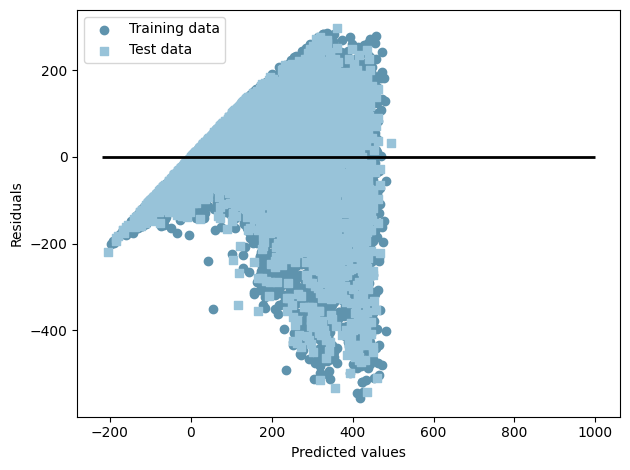

In [31]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='#5f93ad', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='#98c3d9', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-220, xmax=1000, lw=2, color='#000000')
plt.tight_layout()

**Висновки з завдання (детальні)**



1. значна частина залишків розташована нижче нульової осі, що може означати, що модель систематично недооцінює або переоцінює деякі спостереження
2. на графіку також помітні віддалені точки, які різко відрізняються від основної маси (ймовірні викиди або аномалії), що можуть псувати навчання моделі